# Neural Network Visualizer

### Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Loading MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Plotting Data

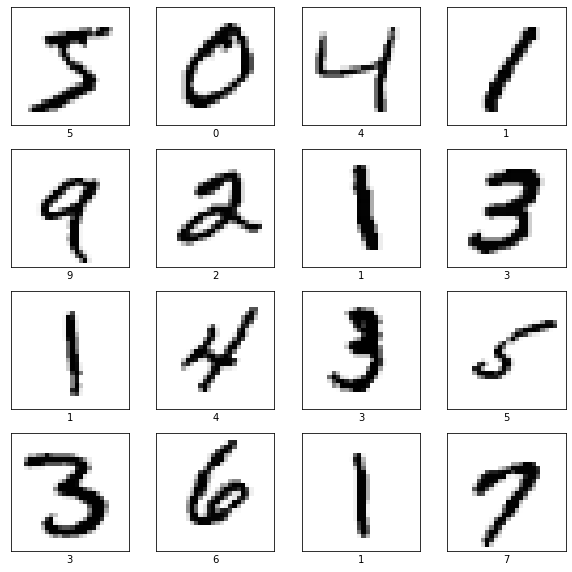

In [3]:
plt.figure(figsize=(10,10))

for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap='Greys')
    plt.xlabel(str(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

### Resizing data

This is done to make a single line vector of the images to make it easier to feed into the neural network.

In [4]:
X_train = np.reshape(X_train, (60000,784))
X_train = X_train/255.0

X_test = np.reshape(X_test, (10000,784))
X_test = X_test/255.0

### Model Creation and Training

We create a 3 layer model and use use the activation as sigmoid for the purpose of visualization only. ReLU in this case would have given us better results in terms of accuracy.

In [5]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(784,)),
                             tf.keras.layers.Dense(32, activation='sigmoid'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

A large batch size is taken since the data is not compute intensive and to speed up the training process.

In [6]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=1024, verbose=2)

Epoch 1/20
59/59 - 0s - loss: 2.1879 - accuracy: 0.3915 - val_loss: 1.9644 - val_accuracy: 0.6346
Epoch 2/20
59/59 - 0s - loss: 1.7648 - accuracy: 0.7042 - val_loss: 1.5384 - val_accuracy: 0.7667
Epoch 3/20
59/59 - 0s - loss: 1.3624 - accuracy: 0.7901 - val_loss: 1.1741 - val_accuracy: 0.8216
Epoch 4/20
59/59 - 0s - loss: 1.0498 - accuracy: 0.8355 - val_loss: 0.9116 - val_accuracy: 0.8530
Epoch 5/20
59/59 - 0s - loss: 0.8264 - accuracy: 0.8597 - val_loss: 0.7275 - val_accuracy: 0.8707
Epoch 6/20
59/59 - 0s - loss: 0.6702 - accuracy: 0.8749 - val_loss: 0.5993 - val_accuracy: 0.8841
Epoch 7/20
59/59 - 0s - loss: 0.5618 - accuracy: 0.8862 - val_loss: 0.5107 - val_accuracy: 0.8934
Epoch 8/20
59/59 - 0s - loss: 0.4859 - accuracy: 0.8943 - val_loss: 0.4475 - val_accuracy: 0.9011
Epoch 9/20
59/59 - 0s - loss: 0.4307 - accuracy: 0.9015 - val_loss: 0.4018 - val_accuracy: 0.9057
Epoch 10/20
59/59 - 0s - loss: 0.3897 - accuracy: 0.9078 - val_loss: 0.3659 - val_accuracy: 0.9107
Epoch 11/20
59/59 -

### Saving the model

The model is saved in a .h5 format to be loaded into the Keras API later for predictions in real-time.

In [7]:
model.save('model.h5')